# Data Analysis
Here we go, this is what we've been waiting for. Time to do some analysis!

In [1]:
from os import path
import numpy as np
import pandas as pd
from IPython.display import display

if all([path.exists("data/ready/{}.csv".format(file)) for file in ["AlbumData", "ArtistData", "CompleteStreamingHistory", "FullEpisodeData", "FullTrackData", "TrackFeatureData"]]):
    album_data_df = pd.read_csv("data/ready/AlbumData.csv")
    album_data_df.drop(album_data_df.columns[0], axis=1, inplace=True)
    artist_data_df = pd.read_csv("data/ready/ArtistData.csv")
    artist_data_df.drop(artist_data_df.columns[0], axis=1, inplace=True)
    complete_streaming_history_df = pd.read_csv("data/ready/CompleteStreamingHistory.csv")
    complete_streaming_history_df.drop(complete_streaming_history_df.columns[0], axis=1, inplace=True)
    full_episode_data_df = pd.read_csv("data/ready/FullEpisodeData.csv")
    full_episode_data_df.drop(full_episode_data_df.columns[0], axis=1, inplace=True)
    full_track_data_df = pd.read_csv("data/ready/FullTrackData.csv")
    full_track_data_df.drop(full_track_data_df.columns[0], axis=1, inplace=True)
    track_feature_data_df = pd.read_csv("data/ready/TrackFeatureData.csv")
    track_feature_data_df.drop(track_feature_data_df.columns[0], axis=1, inplace=True)
    print("Data ready for analysis")
else:
    print("Run feature analysis from other journal before continuing")

Data ready for analysis


/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## The Data
Let's explore some of the datasets we have access to:

In [2]:
print(complete_streaming_history_df.shape[0])
complete_streaming_history_df.head(3)

26823


,date,time,type,id,ms_played
0,2020-01-01,00:51:00,track,4hns23kYYZg0BhDwXeDxB1,680
1,2020-01-01,00:52:00,track,3sLmks6fCY40bBSGDjU4FO,3282
2,2020-01-01,00:52:00,track,2408a07TNDga6lMlaIFLEU,1496


### CompleteStreamingHistory
This dataset is mostly what we got from spotify, describing the id of the track or podcast episode listened to at what time, and how long it was listened to.
* date - The date listened to the track or episode in 2020
* time - The time at the end of the track
* type - `track` if the track listened to was a song, `episode` if it was a podcast episode
* id - The track ID of the track described (not completely accurate, since Spotify did not provide these ids)
* ms_played - How long the specified track was listened to

In [3]:
print(full_track_data_df.shape[0])
full_track_data_df.head(3)

5409


,id,album_id,album_name,album_release_date,album_total_tracks,artist_ids,artist_names,duration_ms,explicit,name,popularity,track_number,genres
0,4hns23kYYZg0BhDwXeDxB1,0Gwu5X7W1mrkSTk2uZ25cv,Blues & Politics,1999-06-29,8,['54YNxT02JdAApvFBhD8ea0'],['Mingus Big Band'],499826,False,Haitian Fight Song,29,2,"['modern big band', 'bebop', 'big band', 'jazz']"
1,3sLmks6fCY40bBSGDjU4FO,7By1lfK4fTIs2YsMvA0FWH,The Project,2004-01-01,10,['5zS6TsJ4lQFUGePSHAXaI9'],['Andy Martin & Vic Lewis'],459106,False,Everything You Is,0,6,[]
2,2408a07TNDga6lMlaIFLEU,5gfrrR8BnDgFhqGWcQaWFe,And the Danish Radio Big Band & Eclipse,2013-05-10,22,['6DbqS0X8cSFOPGsvyze2yh'],['Thad Jones'],255466,False,To You,6,2,"['big band', 'cool jazz', 'soul jazz', 'jazz t..."


### FullTrackData
This dataset is a listing of all tracks listened to during the year, and the full list of features obtained through Spotify's `tracks` endpoint
* id - The track ID of the track described
* album_id - The ID of the album that the track is on (may not be entirely accurate, this was obtained from a best-guess procedure)
* album_name - The name of the album the track appears on
* album_release_date - The date of release of the album (may not be entirely accurate, some data is only accurate to year, some to month, some to day)
* album_total_tracks - The total number of tracks on the album
* artist_ids - A list of all the ids of artists on the track
* artist_names - A list of names of all the artists on the track
* duration_ms - How long the track lasts in ms
* explicit - If true, song is explicit
* name - Name of the track
* popularity - How popular a track is, based on Spotify's proprietary popularity algorithm
* track_number - The index of the track on its album
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)

In [4]:
print(track_feature_data_df.shape[0])
track_feature_data_df.head(3)

5409


,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,boringness
0,4hns23kYYZg0BhDwXeDxB1,0.386,0.392,2,-14.123,0,0.0408,0.536,0.794,0.167,0.3990,89.153,4,152.830
1,3sLmks6fCY40bBSGDjU4FO,0.581,0.517,5,-10.203,0,0.0378,0.901,0.794,0.108,0.5530,138.751,4,238.348
2,2408a07TNDga6lMlaIFLEU,0.138,0.110,5,-15.402,1,0.0337,0.945,0.943,0.111,0.0534,61.730,4,71.128


### TrackFeatureData
This dataset is a listing of all tracks listened to during the year, along with all of the features obtained through Spotify's `audio-features` endpoint. This contains data calculated by Spotify with their proprietary algorithms. (Descriptions come directly from Spotify)
* id - The track ID of the track described
* danceability - Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
* energy - A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
* key - The key the track is in (0 = C, 1 = C#/Db, etc.)
* loudness - The overall loudness of a track in decibels (dB)
* mode - Indicates the modality (major or minor) of a track (0 = Major, 1 = Minor)
* speechiness - Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value
* instrumentalness - Predicts whether a track contains no vocals
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive
* tempo - The overall estimated tempo of a track in beats per minute (BPM)
* time_signature - An estimated overall time signature of a track
* boringness - An arbitrary score calculated from an equation from [this article](https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de) that shows how boring a track is

In [5]:
print(album_data_df.shape[0])
album_data_df.head(3)

2923


,id,album_type,artist_ids,artist_names,copyright_texts,genres,image_url,label,name,popularity,release_date,total_tracks
0,0Gwu5X7W1mrkSTk2uZ25cv,album,['54YNxT02JdAApvFBhD8ea0'],['Mingus Big Band'],"['1999 Francis Dreyfus Music SARL, a BMG Compa...",[],https://i.scdn.co/image/ab67616d0000b27315338b...,Dreyfus Jazz,Blues & Politics,28,1999-06-29,8
1,7By1lfK4fTIs2YsMvA0FWH,album,['5zS6TsJ4lQFUGePSHAXaI9'],['Andy Martin & Vic Lewis'],"['2004 Drewbone Music', '2004 Drewbone Music']",[],https://i.scdn.co/image/ab67616d0000b273750e6c...,Drewbone Music,The Project,5,2004-01-01,10
2,5gfrrR8BnDgFhqGWcQaWFe,album,['6DbqS0X8cSFOPGsvyze2yh'],['Thad Jones'],['(C) 2013 Storyville Records'],[],https://i.scdn.co/image/ab67616d0000b2731a5d61...,Storyville,And the Danish Radio Big Band & Eclipse,15,2013-05-10,22


### AlbumData
This dataset is a listing of all albums of the tracks listened to during the year, along with all of the features obtained through Spotify's `album` endpoint.
* id - The album ID of the album described
* album_type - The type of album it is (album, compilation, single) (may not be accurate)
* artist_ids - List of ids of major artists on the album
* artist_names - List of names of major artists on the album
* copyright_texts - Copyrights of the album
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)
* image_url - URL of the album image
* label - Record label of the album
* name - Name of the album
* popularity - Popularity of the album based on Spotify's proprietary popularity algorithm
* release_date - The date of release of the album (may not be entirely accurate, some data is only accurate to year, some to month, some to day)
* total_tracks - The total number of tracks on the album

In [6]:
print(artist_data_df.shape[0])
artist_data_df.head(3)

2413


,id,genres,name,popularity
0,54YNxT02JdAApvFBhD8ea0,"['bebop', 'big band', 'jazz', 'modern big band']",Mingus Big Band,33
1,5zS6TsJ4lQFUGePSHAXaI9,[],Andy Martin & Vic Lewis,2
2,6DbqS0X8cSFOPGsvyze2yh,"['bebop', 'big band', 'cool jazz', 'hard bop',...",Thad Jones,42


### ArtistData
This dataset is a listing of all artists of the tracks listened to during the year, along with all of the features obtained through Spotify's `artist` endpoint.
* id - The artist ID of the artist described
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)
* name - Name of the artist
* popularity - Popularity of the artist based on Spotify's proprietary popularity algorithm

In [7]:
print(full_episode_data_df.shape[0])
full_episode_data_df.head(3)

477


,id,description,duration_ms,explicit,image_url,name,release_date,show_id,show_copyright_texts,show_description,show_explicit,show_image_url,show_name,show_publisher,show_total_episodes
0,1zC8VOx9ltEhS1DzeHOg5I,In this episode we meet Elliot Alderson (@fs0c...,2873078,False,https://i.scdn.co/image/3645a43f9aed7fa7e63dbe...,Ep 49: Elliot,2019-10-15,4XPl3uEEL9hvqMkoZrzbx5,[],Explore true stories of the dark side of the I...,False,https://i.scdn.co/image/838edb072aec169c858b87...,Darknet Diaries,Jack Rhysider,83
1,0RMFL7GGtxWSLvVgM1Y9oz,This is the story about when a nation state ha...,3047654,False,https://i.scdn.co/image/a370a9e7159574b295c993...,Ep 48: Operation Socialist,2019-10-01,4XPl3uEEL9hvqMkoZrzbx5,[],Explore true stories of the dark side of the I...,False,https://i.scdn.co/image/838edb072aec169c858b87...,Darknet Diaries,Jack Rhysider,83
2,0SF6oXn0z9UiT299AWAJJU,This is the story about the XBox hacking scene...,4940983,True,https://i.scdn.co/image/d186d62ea3d8f6bc073bd4...,Ep 45: XBox Underground (Part 1),2019-08-20,4XPl3uEEL9hvqMkoZrzbx5,[],Explore true stories of the dark side of the I...,False,https://i.scdn.co/image/838edb072aec169c858b87...,Darknet Diaries,Jack Rhysider,83


### FullEpisodeData
This dataset is a listing of all podcast episodes listened to during the year along with their show, and the full list of features obtained through Spotify's `episodes` endpoint
* id - The episode ID of the episode described
* description - The description associated with the episode
* duration_ms - How long the episode lasts in ms
* explicit - If true, episode is explicit
* image_url - The url of the episode's image
* name - Name of the episode
* release_date - Release date of the episode
* show_id - The ID of the show that the episode belongs to
* show_copyright_texts - A list of all copyrights associated with the show
* show_explicit - If true, show is explicit
* show_image_url - The url of the show's image
* show_name - Name of the show
* show_publisher - Publisher of the show
* show_total_episodes - Number of total episodes released by this show at time of procurement (January 27, 2021)

## Analysis
Let's do some analysis!

In [8]:
# Setup

import math
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
register_matplotlib_converters()
rcParams['figure.figsize'] = 18.5, 7.5
rcParams['font.size'] = 16

ms_to_minutes = 1000 * 60
ms_to_hours = ms_to_minutes * 60
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [9]:
complete_streaming_history_df["month"] = complete_streaming_history_df["date"].apply(lambda date: int(date[5:7]))
complete_streaming_history_df["day"] = complete_streaming_history_df["date"].apply(lambda date: int(date[8:10]))
month_range = [complete_streaming_history_df["month"].min(), complete_streaming_history_df["month"].max()]
month_range

[1, 12]

We'll use this to fill in empty dates:

In [10]:
thirty_one_day_months = [1, 3, 5, 7, 8, 10, 12]
full_year_arr = [["2020-{:02}-{:02}".format(month, day), 0, int(month), int(day)]
                 for month in range(1, 13)
                 for day in range(1, 32 if month in thirty_one_day_months else 31 if month != 2 else 30)]
full_year_df = pd.DataFrame(full_year_arr, columns=["date", "ms_played", "month", "day"])
full_year_df = full_year_df[full_year_df["date"] >= "2020-{:02}-01".format(month_range[0])]
if month_range[1] < 12:
    full_year_df = full_year_df[full_year_df["date"] < "2020-{:02}-01".format(month_range[1] + 1)]
full_year_df = full_year_df.reset_index(drop=True)

full_year_df.head()

,date,ms_played,month,day
0,2020-01-01,0,1,1
1,2020-01-02,0,1,2
2,2020-01-03,0,1,3
3,2020-01-04,0,1,4
4,2020-01-05,0,1,5


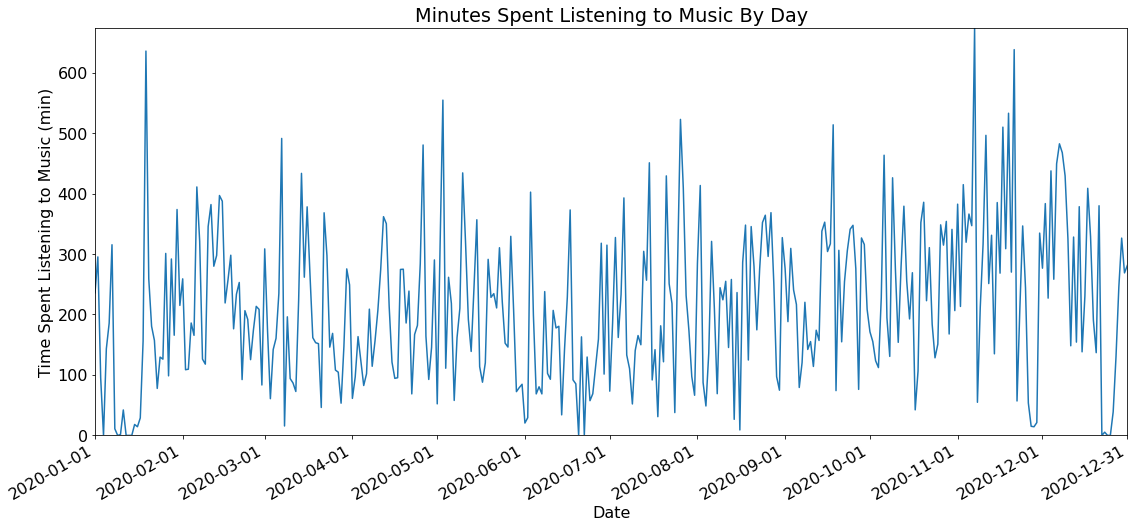

In [11]:
def show_minutes_spent_listening_to_music_by_day(data):
    plt.plot(data[:,0], data[:,1])
    plt.title("Minutes Spent Listening to Music By Day")
    plt.xlabel("Date")
    plt.xticks(["2020-{:02}-01".format(month) for month in range(month_range[0], month_range[1] + 1)] + [data[len(data)-1,0]], ha='right')
    plt.xticks(rotation=30)
    plt.ylabel("Time Spent Listening to Music (min)")
    plt.margins(0)

data = complete_streaming_history_df[["date", "ms_played"]].groupby(["date"]).sum().apply(lambda x: x / ms_to_minutes)
full_year_copy_df = full_year_df[["date", "ms_played"]].copy().set_index("date")
full_year_copy_df.update(data)
data = full_year_copy_df.reset_index().to_numpy()
show_minutes_spent_listening_to_music_by_day(data)

plt.show()

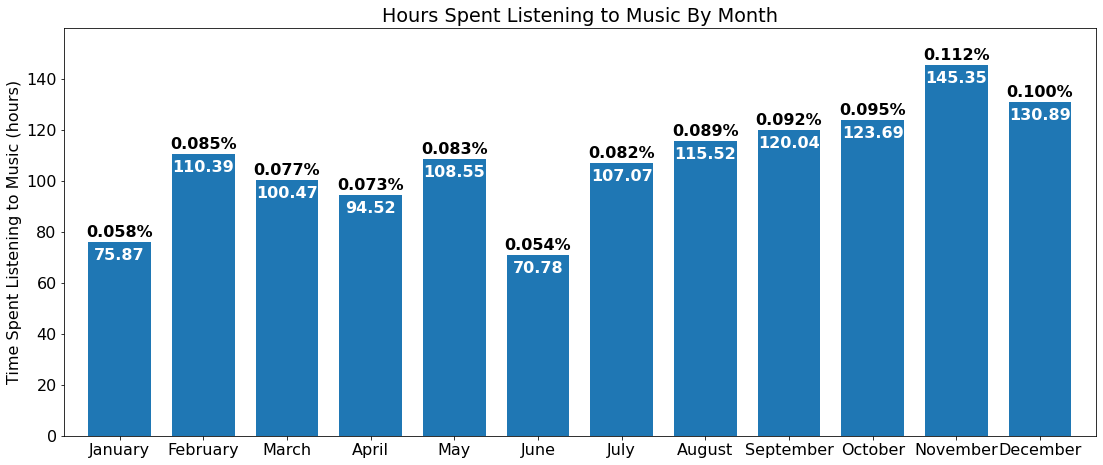

In [12]:
def show_minutes_spent_listening_to_music_by_month(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars 
    ax.bar(data[:,0], data[:,1], width)
    for i, [hours, percentage] in enumerate(data[:,1:]):
        ax.text(i + month_range[0], data[i,1] - 7, "{:.2f}".format(hours) if float(percentage) > 0.01 else "", color='white', fontweight='bold', horizontalalignment='center')
        ax.text(i + month_range[0], data[i,1] + 2, "{}%".format(percentage), color='black', fontweight='bold', horizontalalignment='center')
    
    plt.title("Hours Spent Listening to Music By Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0]-1:month_range[1]])
    plt.ylabel("Time Spent Listening to Music (hours)")
    plt.margins(0.025, 0.1)

ms_to_minutes = 1000 * 60
data = complete_streaming_history_df[["month", "ms_played"]].groupby(["month"]).sum().apply(lambda x: x / ms_to_hours)
full_year_copy_df = full_year_df[["month", "ms_played"]].copy().drop_duplicates().set_index("month")
full_year_copy_df.update(data)
data = full_year_copy_df.reset_index()
total_hours_listened = data["ms_played"].sum()
data["percentage"] = data.apply(lambda row: "{:.3f}".format(row["ms_played"] / total_hours_listened), axis=1)
data = data.reset_index(drop=True).to_numpy()
show_minutes_spent_listening_to_music_by_month(data)

plt.show()

In [13]:
# complete_streaming_history, but only keep songs and songs that have been listened to for at least half their runtime
trimmed_tracks_data_df = complete_streaming_history_df[complete_streaming_history_df["type"] == "track"]
trimmed_tracks_data_df = trimmed_tracks_data_df.merge(full_track_data_df[["id", "duration_ms"]], on="id")
trimmed_tracks_data_df = trimmed_tracks_data_df[trimmed_tracks_data_df["ms_played"] > (trimmed_tracks_data_df["duration_ms"] / 2)]
trimmed_tracks_data_df = trimmed_tracks_data_df.sort_values(by=["date", "time"]).reset_index(drop=True)
trimmed_tracks_data_df.head()

,date,time,type,id,ms_played,month,day,duration_ms
0,2020-01-01,00:52:00,track,4Saza06xljloZwotqXdNle,66171,1,1,128000
1,2020-01-01,00:55:00,track,0rupt7DuLo3WGecL3cyi19,150773,1,1,150773
2,2020-01-01,01:09:00,track,61CNyCHQjU1s9YjZ5WbR7W,185180,1,1,354973
3,2020-01-01,13:18:00,track,5NxC33tgrysAEqc62yukdT,191360,1,1,191360
4,2020-01-01,13:21:00,track,2WbKDH7BbDUHqACsZH0KVW,205322,1,1,205322


Let's also keep track of the total number of times we've listened to a given song:

In [14]:
trimmed_tracks_count = trimmed_tracks_data_df[["id", "date"]].groupby("id").size().reset_index(name="count")
trimmed_tracks_data_df = trimmed_tracks_data_df.merge(trimmed_tracks_count, on="id")
trimmed_tracks_data_df = trimmed_tracks_data_df.sort_values(by=["date", "time"]).reset_index(drop=True)
trimmed_tracks_data_df.head()

,date,time,type,id,ms_played,month,day,duration_ms,count
0,2020-01-01,00:52:00,track,4Saza06xljloZwotqXdNle,66171,1,1,128000,1
1,2020-01-01,00:55:00,track,0rupt7DuLo3WGecL3cyi19,150773,1,1,150773,4
2,2020-01-01,01:09:00,track,61CNyCHQjU1s9YjZ5WbR7W,185180,1,1,354973,6
3,2020-01-01,13:18:00,track,5NxC33tgrysAEqc62yukdT,191360,1,1,191360,12
4,2020-01-01,13:21:00,track,2WbKDH7BbDUHqACsZH0KVW,205322,1,1,205322,8


We'll graph some features now! We'll start by comparing Spotify's data with my data:

In [15]:
graphable_features = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness",
                      "liveness", "valence", "tempo", "loudness", "boringness"]

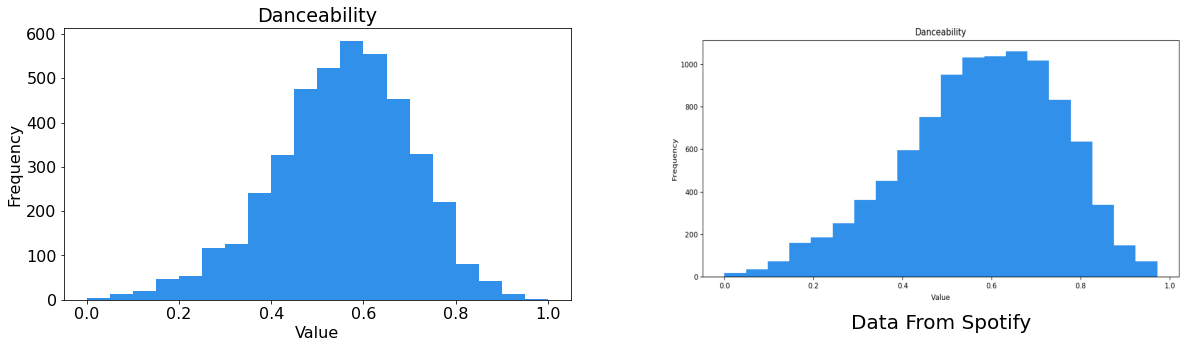

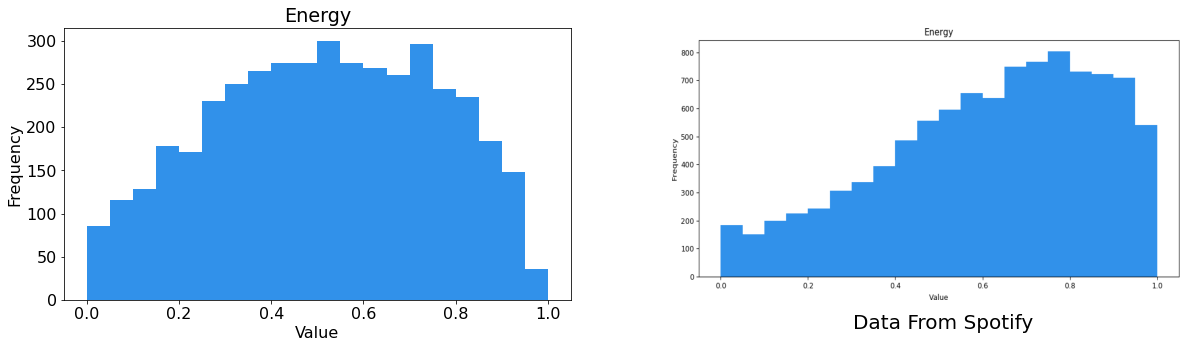

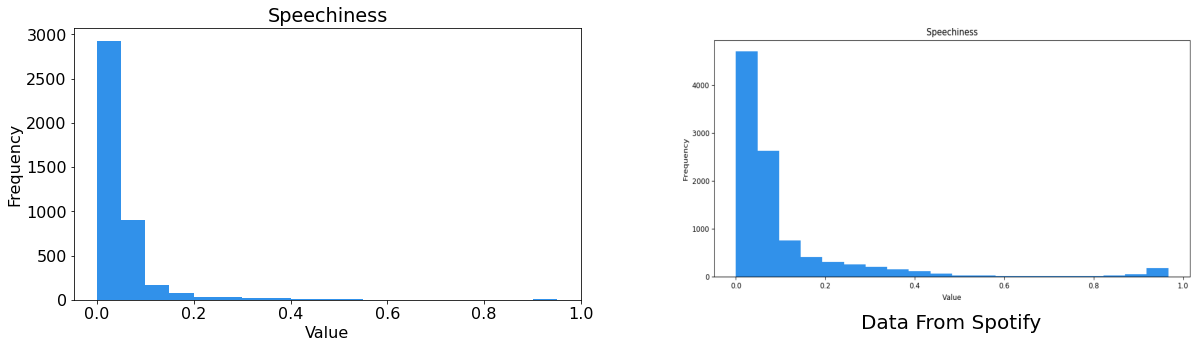

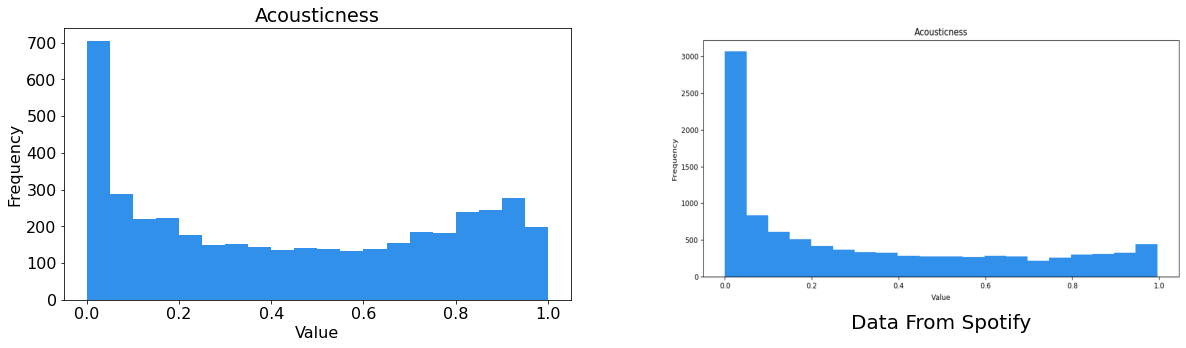

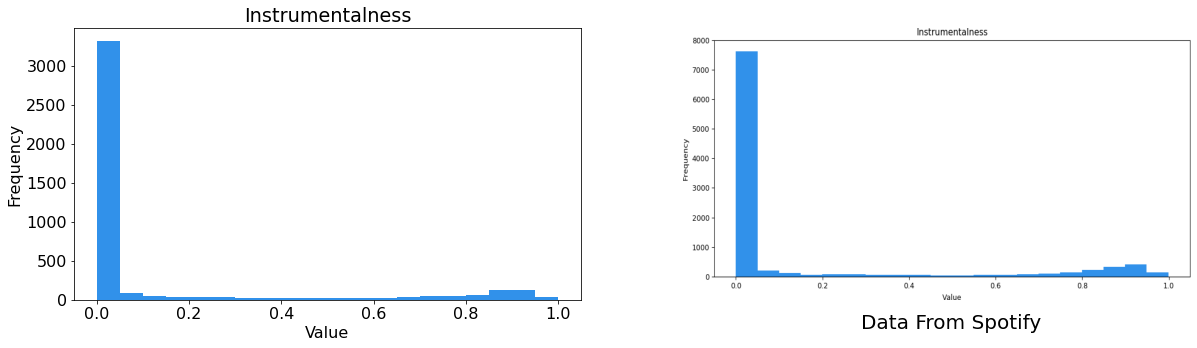

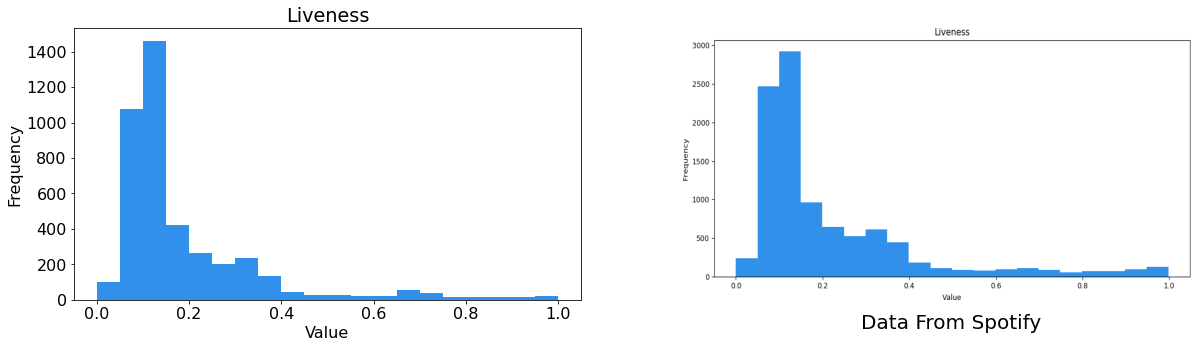

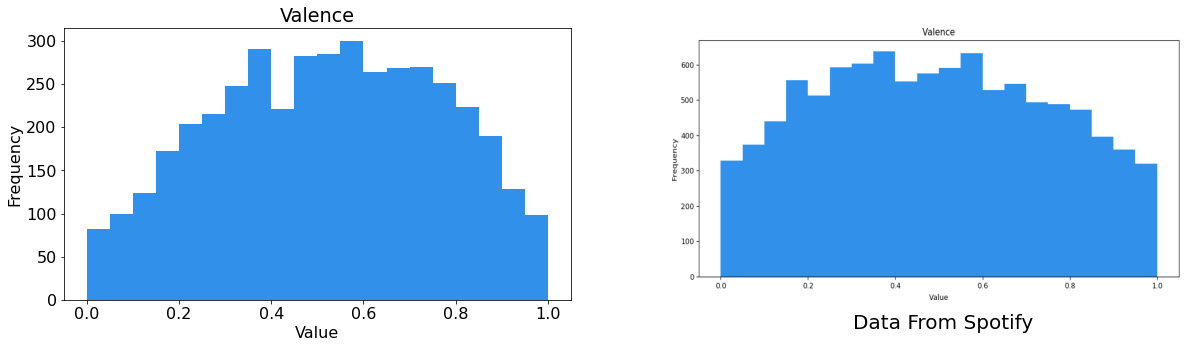

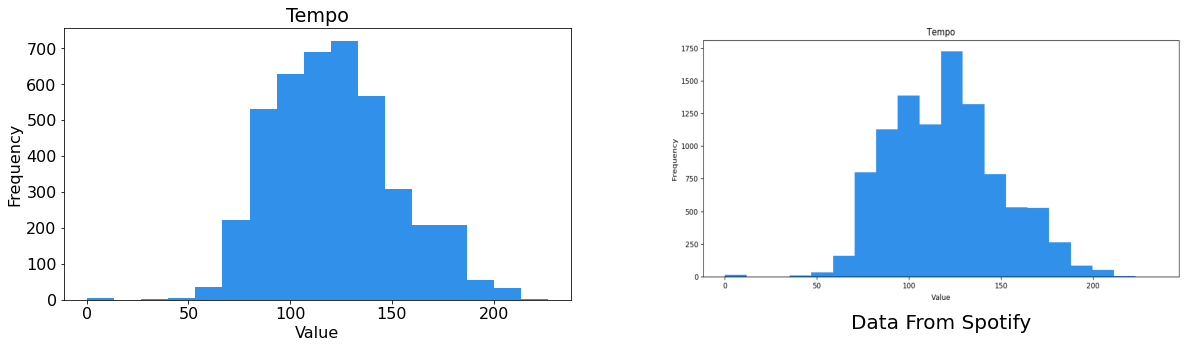

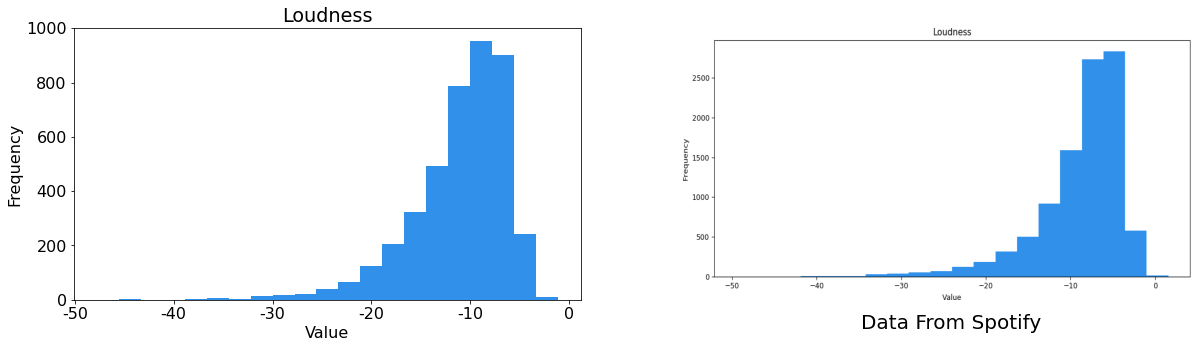

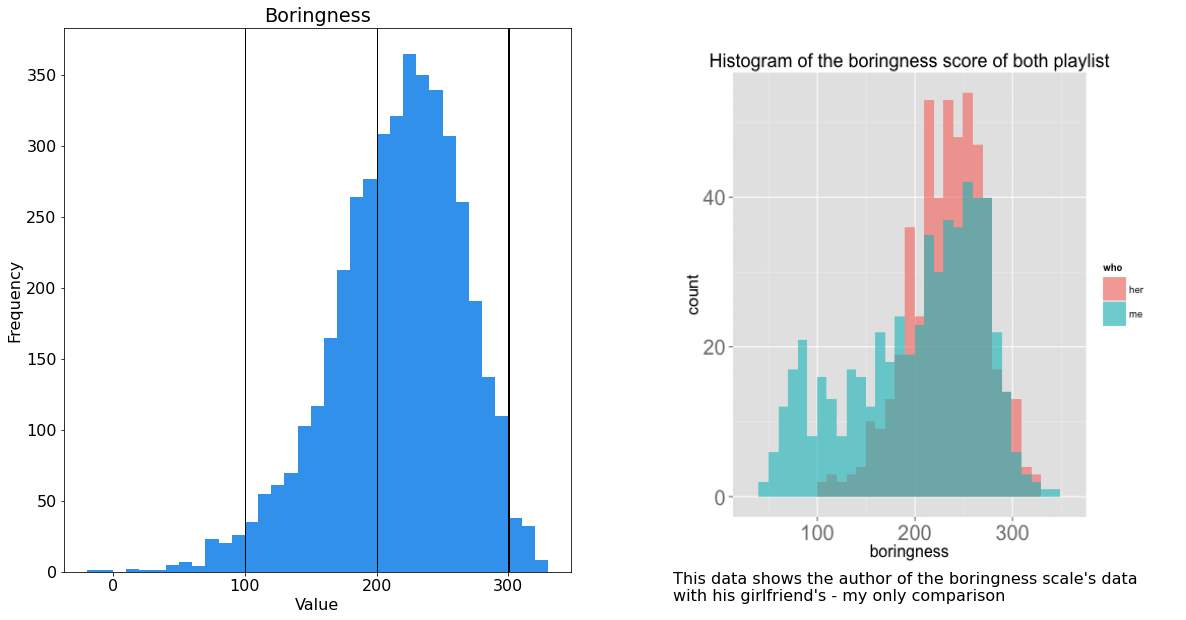

In [16]:
def graph_features(feature):
    def show_features(data):
        fig, ax = plt.subplots(1, 2, figsize=[20, 5] if feature != "boringness" else [20, 10])
        ax[0].bar(data[:,0], data[:,1], 1.0, align="edge" if feature != "loudness" else "center", color="#3191ea")
        img = mpimg.imread('res/' + feature + '.png')
        ax[1].imshow(img, aspect="auto")

        ax[0].set_title(feature[0].upper() + feature[1:])
        if feature == "tempo":
            ax[0].set_xticks([0, 3.75, 7.5, 11.25, 15])
            ax[0].set_xticklabels([0, 50, 100, 150, 200])
        elif feature == "loudness":
            ax[0].set_xticks([-22.5, -18, -13.5, -9, -4.5, 0])
            ax[0].set_xticklabels([-50, -40, -30, -20, -10, 0])
        elif feature == "boringness":
            ax[0].set_xticks([0, 10, 20, 30, 40])
            ax[0].set_xticklabels([0, 100, 200, 300, 400])
        else:
            ax[0].set_xticks([0, 4, 8, 12, 16, 20])
            ax[0].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[0].set_xlabel("Value")
        ax[0].set_ylabel("Frequency")

        ax[1].axis("off")
        
        if feature == "boringness":
            ax[0].axvspan(10, 10.01, color="black", zorder=1)
            ax[0].axvspan(20, 20.01, color="black", zorder=1)
            ax[0].axvspan(30, 30.01, color="black", zorder=1)
            ax[1].text(0, 540, "This data shows the author of the boringness scale's data\nwith his girlfriend's - my only comparison")
        else:
            ax[1].text(525, 490, "Data From Spotify", ha="center", size=20)

    def get_bucket(row):
        if feature == "tempo":
            return row[feature] // 13
        elif feature == "loudness":
            return row[feature] // 2.2
        elif feature == "boringness":
            return row[feature] // 10
        return math.floor(row[feature] * 20)

    data = trimmed_tracks_data_df[["id", "count"]].drop_duplicates()
    data = data.merge(track_feature_data_df[["id", feature]], on="id").drop(columns=["id"])
    data["bucket"] = data.apply(get_bucket, axis=1)
    data = data.drop(columns=[feature]).groupby("bucket").count()
    data = data.reset_index().to_numpy()
    show_features(data)

    plt.show()

for feature in graphable_features:
    graph_features(feature)

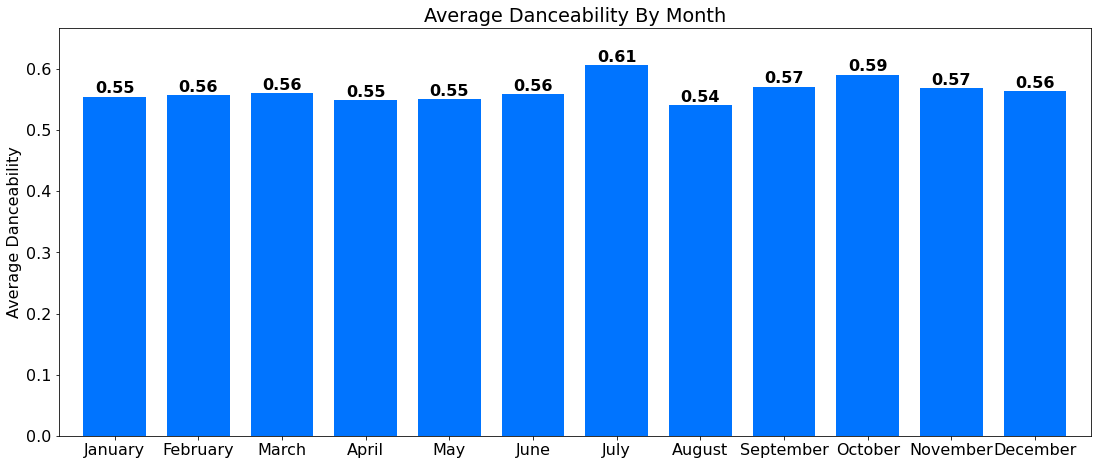

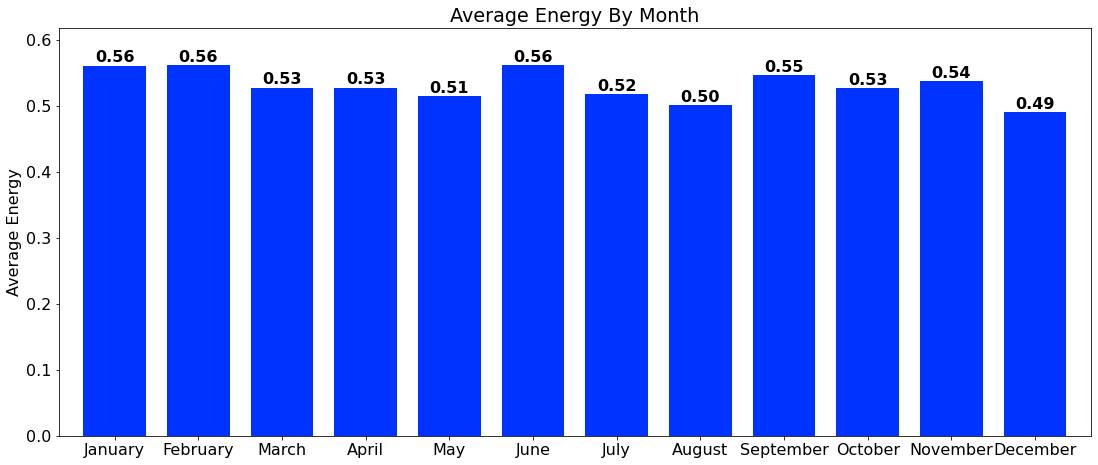

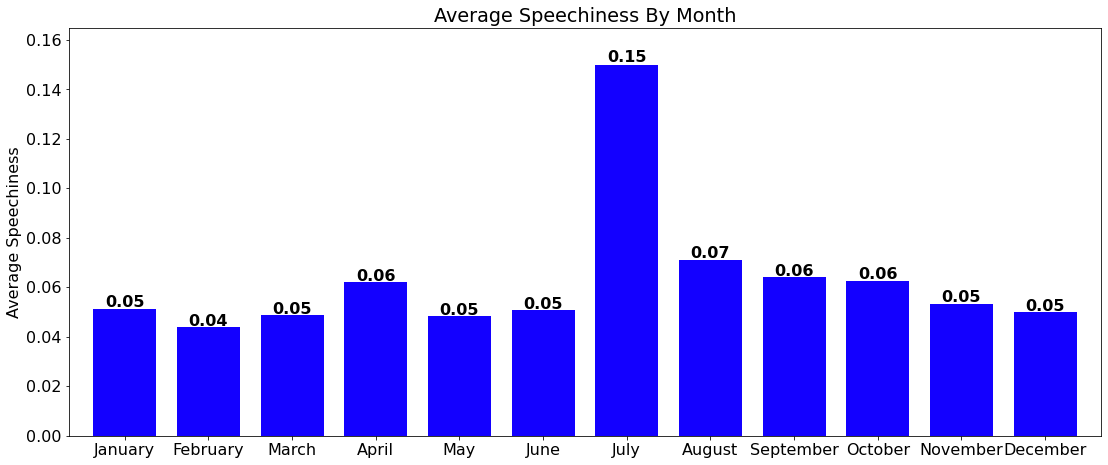

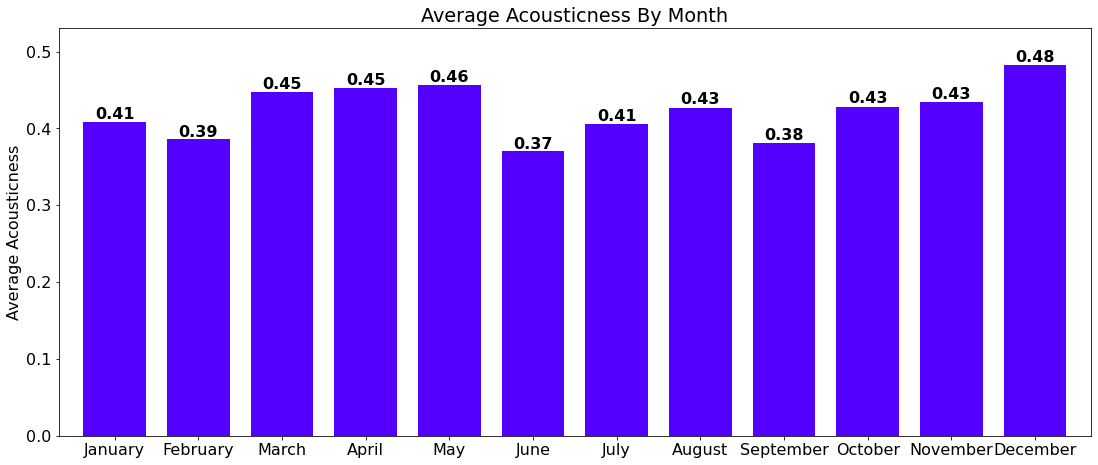

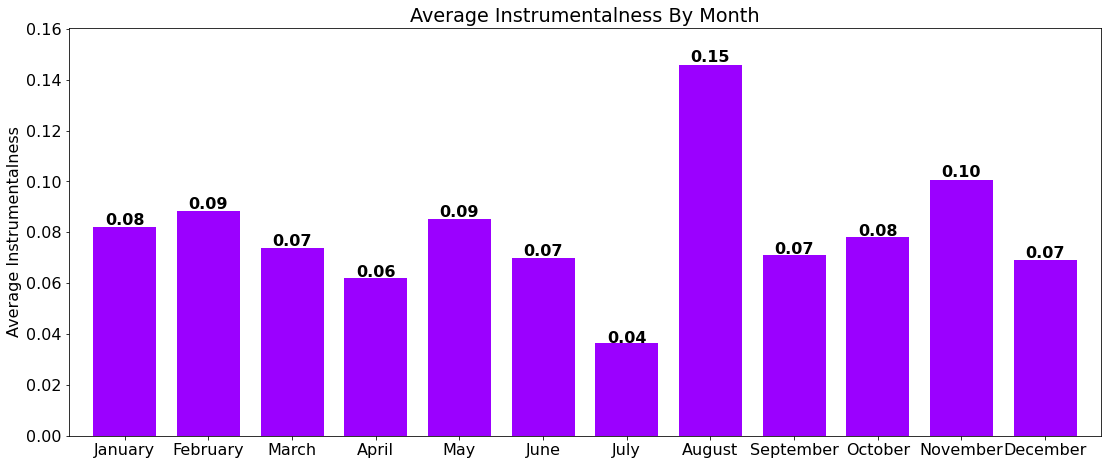

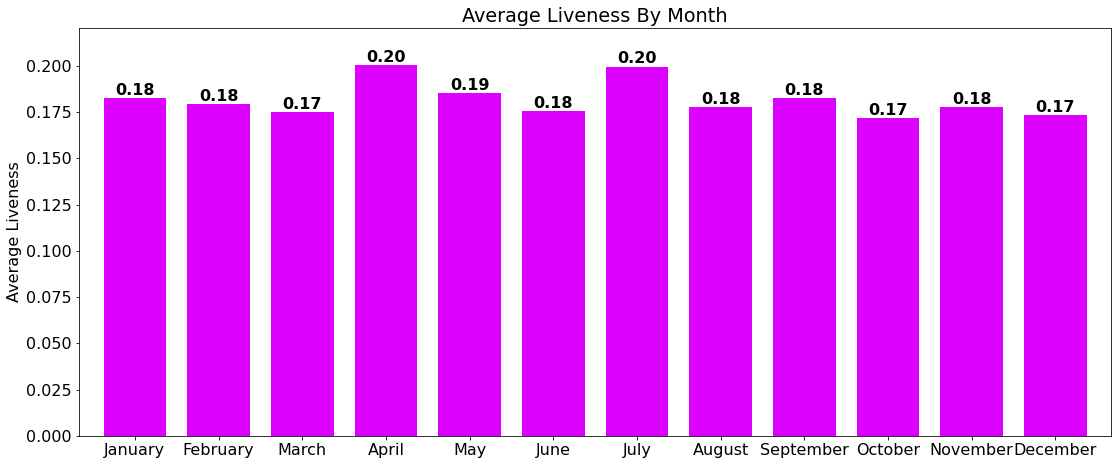

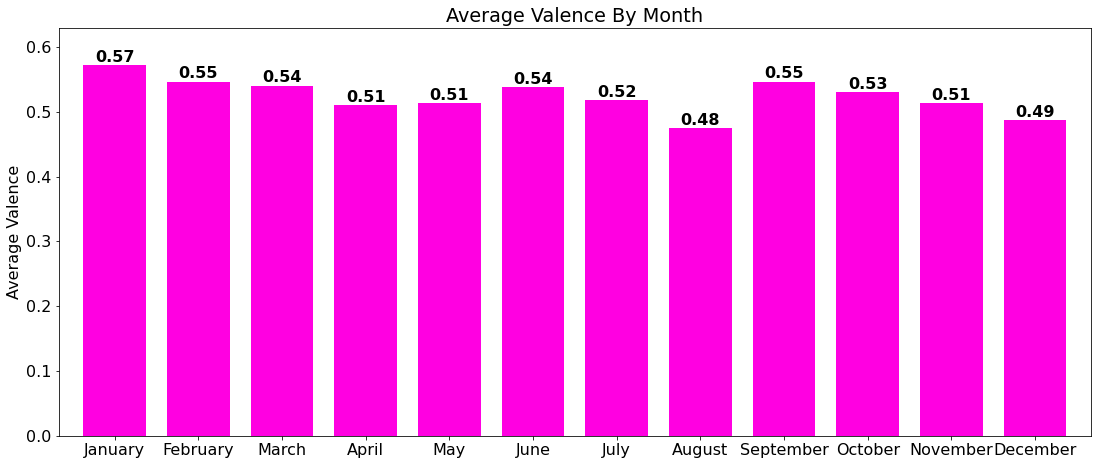

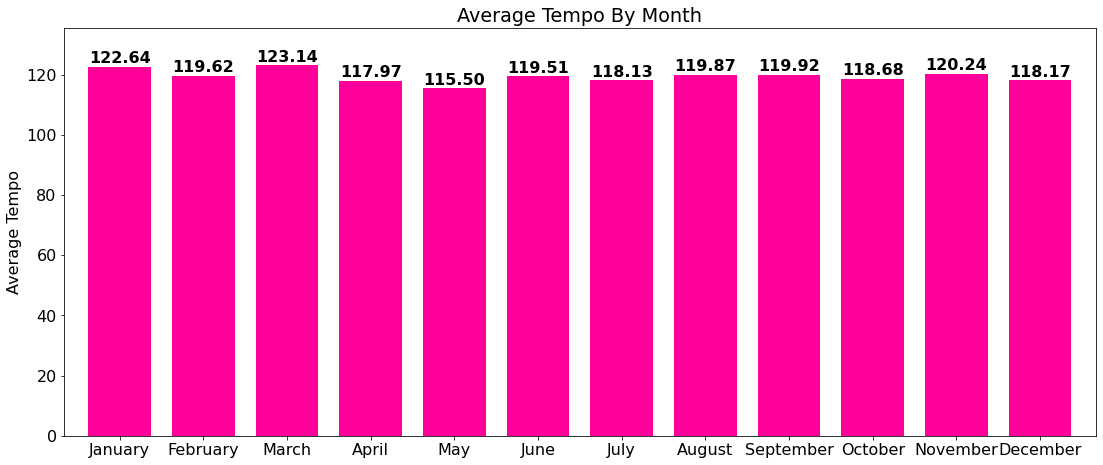

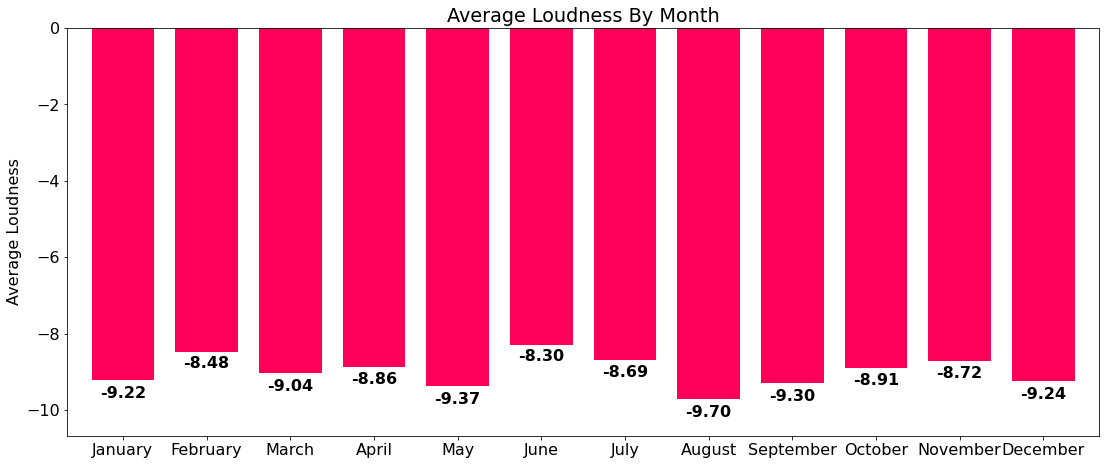

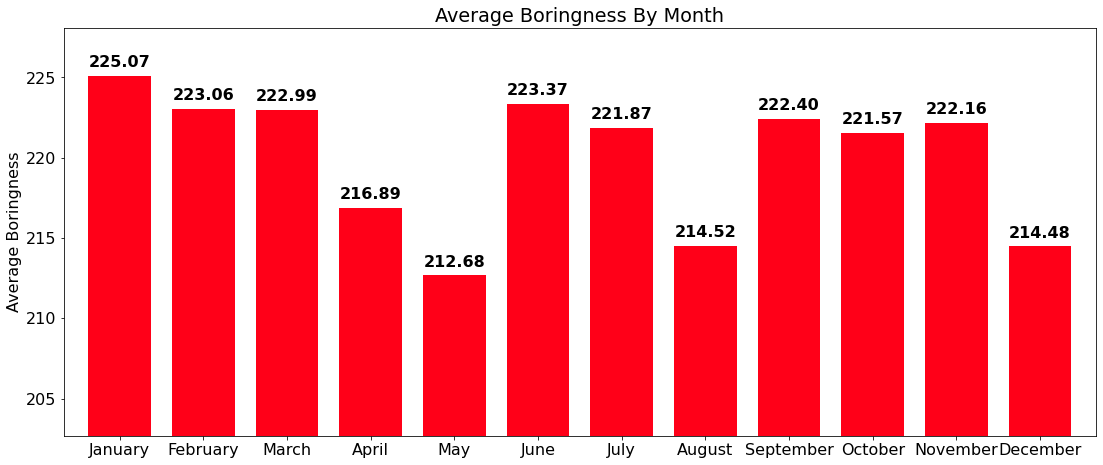

In [17]:
def graph_features_by_month(feature, color):
    def show_feature_by_month(data):
        fig, ax = plt.subplots()
        width = 0.75 # the width of the bars 
        ax.bar(data[:,0], data[:,1], width, color=color)
        for i, dance in enumerate(data[:,1]):
            ax.text(i + month_range[0], data[i,1] + (data[i,1] / ((100 if feature != "boringness" else 400) if feature != "loudness" else 20)), "{:.2f}".format(dance), color='black', fontweight='bold', ha="center")

        plt.title("Average {} By Month".format(feature[0].upper() + feature[1:]))
        plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0] - 1:month_range[1]])
        plt.ylabel("Average {}".format(feature[0].upper() + feature[1:]))
        if feature == "boringness":
            plt.ylim([data[:,1].min()- 10, data[:,1].max() + 3])
        plt.margins(0.025, 0.1)

    data = trimmed_tracks_data_df[["month", "id"]].merge(track_feature_data_df[["id", feature]], on="id")
    data = data.drop(columns=["id"]).groupby(["month"]).mean()
    full_year_copy_df = full_year_df[["month", "ms_played"]].copy().drop_duplicates().rename({"ms_played": feature}, axis=1).set_index("month")
    full_year_copy_df.update(data)
    data = full_year_copy_df.reset_index().to_numpy()
    show_feature_by_month(data)

    plt.show()

colors = cm.hsv(np.linspace(0.6, 1.0, len(graphable_features)))
for i, feature in enumerate(graphable_features):
    graph_features_by_month(feature, colors[i])

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


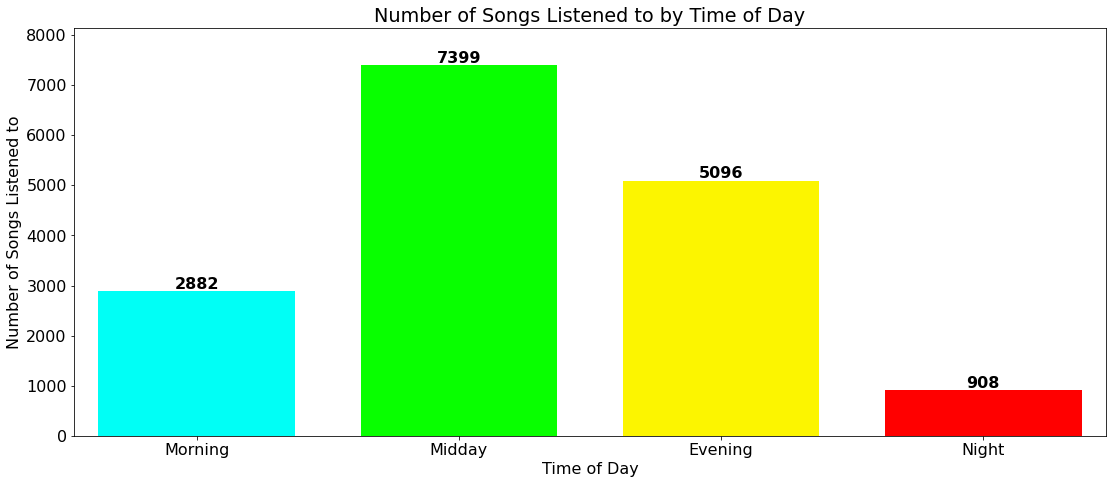

In [18]:
time_buckets = [
    "Morning", # [4:00AM, 10:00AM)
    "Midday", # [10:00AM, 4:00PM)
    "Evening", # [4:00PM, 10:00PM)
    "Night" # [10:00PM, 4:00AM)
]

def show_plays_by_time_of_day(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars
    ax.bar(data[:,0], data[:,1], width, color=cm.hsv(np.linspace(0.5, 0, len(data))))
    for i, plays in enumerate(data[:,1]):
        ax.text(i, data[i,1] + 50, plays, color='black', fontweight='bold', horizontalalignment="center")
    
    plt.title("Number of Songs Listened to by Time of Day")
    plt.xticks(ticks=range(len(data)), labels=time_buckets)
    plt.xlabel("Time of Day")
    plt.ylabel("Number of Songs Listened to")
    plt.margins(0.025, 0.1)

def get_time_bucket(entry):
    hour = int(entry["time"][:2])
    if hour >= 4 and hour < 10:
        return 0
    elif hour >= 10 and hour < 16:
        return 1
    elif hour >= 16 and hour < 22:
        return 2
    return 3

tracks_time_of_day_df = trimmed_tracks_data_df[["time", "month", "id"]]
tracks_time_of_day_df["time_of_day"] = tracks_time_of_day_df.apply(get_time_bucket, axis=1)
data = tracks_time_of_day_df[["time_of_day", "id"]].groupby("time_of_day").count()
data = data.reset_index().to_numpy()
show_plays_by_time_of_day(data)

plt.show()

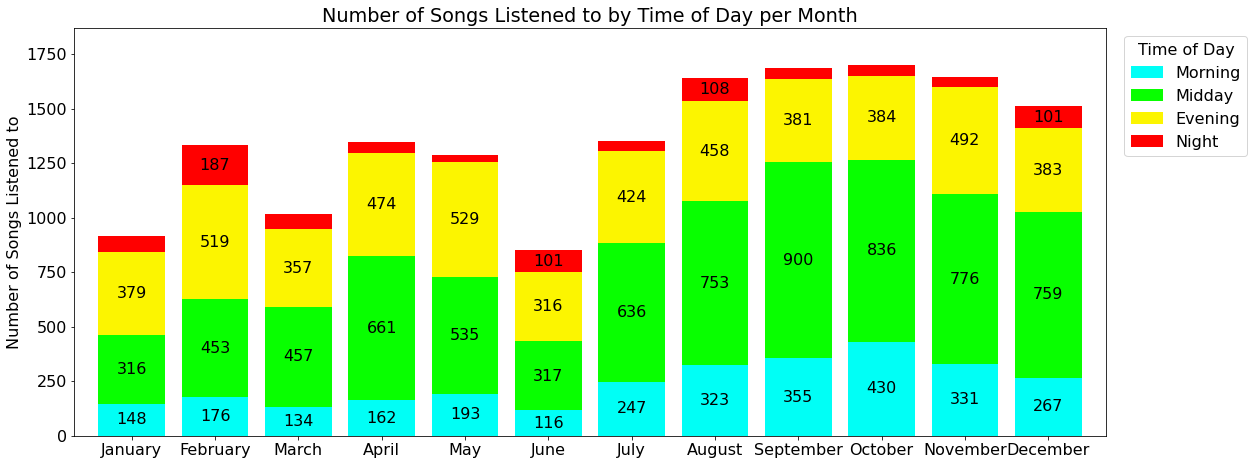

In [19]:
def show_plays_by_time_of_day_by_month(data):
    fig, ax = plt.subplots()

    bottom = (month_range[1] - month_range[0] + 1) * [0]
    color=cm.hsv(np.linspace(0.5, 0, len(time_buckets)))
    for time_of_day in range(len(time_buckets)):
        time_of_day_data = data[data["time_of_day"] == time_of_day].drop(columns=["time_of_day"], axis=1)
        for i in range(1, len(time_of_day_data) + 1):
            if time_of_day_data[time_of_day_data["month"] == i].shape[0] == 0:
                time_of_day_data = time_of_day_data.append({"month": i, "id": 0}, ignore_index=True)
        time_of_day_data = time_of_day_data.sort_values(by="month", ascending=True).to_numpy()
        for i, count in enumerate(time_of_day_data[:,1]):
            if count >= 80:
                ax.text(i + 1, bottom[i] + (time_of_day_data[i,1] / 2), count, color='black', horizontalalignment='center', verticalalignment='center')
        ax.bar(time_of_day_data[:,0], time_of_day_data[:,1], label=time_buckets[time_of_day], bottom=bottom, color=color[time_of_day])
        bottom = bottom + time_of_day_data[:,1]

    plt.title("Number of Songs Listened to by Time of Day per Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[:month_range[1]])
    plt.ylabel("Number of Songs Listened to")
    plt.legend(title="Time of Day", bbox_to_anchor=(1.01, 1))
    plt.margins(0.025, 0.1)

data = tracks_time_of_day_df[["month", "time_of_day", "id"]].groupby(["month", "time_of_day"]).count()
data = data.reset_index()
show_plays_by_time_of_day_by_month(data)

plt.show()

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


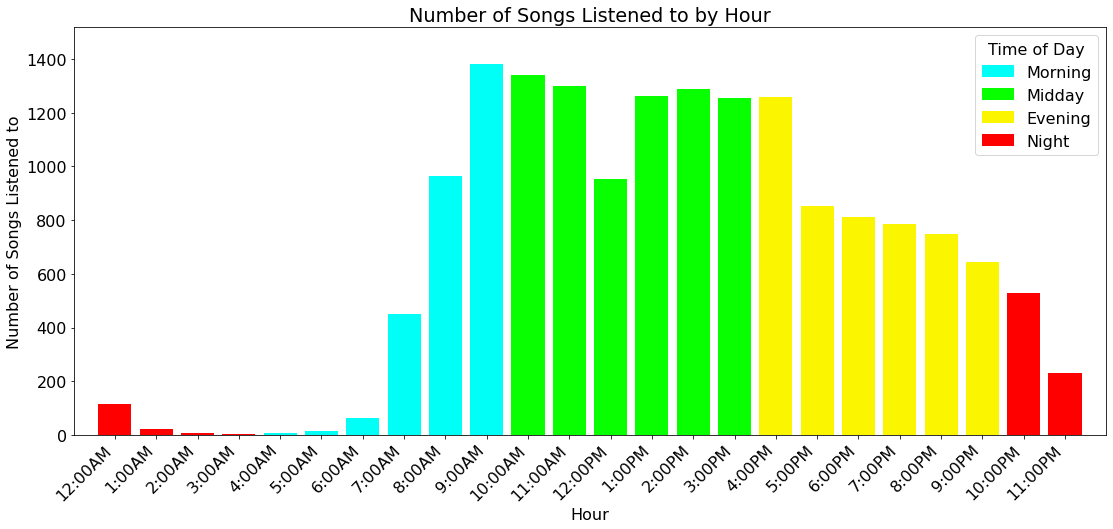

In [20]:
hours = ["12:00AM", "1:00AM", "2:00AM", "3:00AM", "4:00AM", "5:00AM", "6:00AM", "7:00AM", "8:00AM", "9:00AM", "10:00AM", "11:00AM",
         "12:00PM", "1:00PM", "2:00PM", "3:00PM", "4:00PM", "5:00PM", "6:00PM", "7:00PM", "8:00PM", "9:00PM", "10:00PM", "11:00PM"]

def show_plays_by_time_of_day_by_hour(data):
    fig, ax = plt.subplots()
    x = np.arange(0, len(time_buckets))
    color = cm.hsv(np.linspace(0.5, 0, len(time_buckets)))
    for time_of_day in range(len(time_buckets)):
        time_of_day_data = data[data["time_of_day"] == time_of_day].to_numpy()
        plt.bar(time_of_day_data[:,1], time_of_day_data[:,2], label=time_buckets[time_of_day], color=color[time_of_day])
    
    plt.title("Number of Songs Listened to by Hour")
    plt.xticks(ticks=range(len(hours)), labels=hours, rotation=45, ha='right')
    plt.xlabel("Hour")
    plt.ylabel("Number of Songs Listened to")
    plt.legend(title="Time of Day", loc=1)
    plt.margins(0.025, 0.1)

tracks_time_of_day_df["hour"] = tracks_time_of_day_df.apply(lambda entry: int(entry["time"][:2]), axis=1)
data = tracks_time_of_day_df[["time_of_day", "hour", "id"]].groupby(["time_of_day", "hour"]).count()
data = data.reset_index()
show_plays_by_time_of_day_by_hour(data)

plt.show()

In [21]:
counts_per_day_df = trimmed_tracks_data_df[["date", "id"]].groupby("date").count().reset_index().rename({"id": "count"}, axis=1)
highest_day = counts_per_day_df.sort_values(by="count", ascending=False).iloc[0]
print("Most songs listened to in one day: {} with {} songs".format(highest_day["date"], highest_day["count"]))

Most songs listened to in one day: 2020-10-06 with 117 songs


In [22]:
if not "count" in full_track_data_df:
    full_track_data_df = trimmed_tracks_data_df[["id", "count"]].drop_duplicates().merge(full_track_data_df, on="id")
full_track_data_df.sort_values(by="count", ascending=False)[["count", "name", "artist_names", "album_name"]].head(10).reset_index(drop=True)

,count,name,artist_names,album_name
0,55,Unlovely (feat. Darlingside),"['The Ballroom Thieves', 'Darlingside']",Unlovely
1,52,Tenebrist,['The Ballroom Thieves'],Unlovely
2,49,"Hey, Runner!",['The Arcadian Wild'],Finch In The Pantry
3,48,Love Is Easy,['The Ballroom Thieves'],Unlovely
4,47,Don't Wanna Dance,['The Ballroom Thieves'],Unlovely
5,47,Little Too Late,['Nicki Bluhm and the Gramblers'],Nicki Bluhm and The Gramblers
6,44,Vanity Trip,['The Ballroom Thieves'],Unlovely
7,43,Letters from the Atlantic,['The Arcadian Wild'],The Arcadian Wild
8,42,The Food Truck Blues,"['The Arcadian Wild', 'Buddy Greene']",Finch In The Pantry
9,41,I Hope I'm Stoned (When Jesus Takes Me Home) [...,"['Charlie Worsham', 'Old Crow Medicine Show']",I Hope I'm Stoned (When Jesus Takes Me Home) [...


In [23]:
top_tracks_by_month_df = trimmed_tracks_data_df[["month", "id", "date"]].groupby(["month", "id"]).count().reset_index().rename({"date": "count"}, axis=1)
top_tracks_by_month_df = top_tracks_by_month_df.merge(full_track_data_df[["id", "name", "album_id", "album_name", "artist_names"]], on="id")
for month in range(month_range[0], month_range[1] + 1):
    month_data = top_tracks_by_month_df[top_tracks_by_month_df["month"] == month].sort_values(by="count", ascending=False)
    if month_data.shape[0] == 0:
        continue
    top_song = month_data.iloc[0]
    artists_str = " and ".join(eval(top_song["artist_names"]))
    print("{}: {} by {} with {} plays".format(months[month - 1], top_song["name"], artists_str, top_song["count"]))

January: Little Too Late by Nicki Bluhm and the Gramblers with 13 plays
February: No More Dancing by Five Islands with 22 plays
March: Love Is Easy by The Ballroom Thieves with 29 plays
April: 10 ft. Tall by Them Coulee Boys with 10 plays
May: I Hope I'm Stoned (When Jesus Takes Me Home) [feat. Old Crow Medicine Show] by Charlie Worsham and Old Crow Medicine Show with 17 plays
June: Dear McCracken by Bug Hunter with 14 plays
July: You'll Be Back by Jonathan Groff and Original Broadway Cast of Hamilton with 25 plays
August: Born at 5:00 by Bombadil with 17 plays
September: Hey, Runner! by The Arcadian Wild with 16 plays
October: Letters from the Atlantic by The Arcadian Wild with 29 plays
November: Only Home I've Ever Known by The California Honeydrops with 26 plays
December: The Last of the Honey Bees by Sam Burchfield with 34 plays


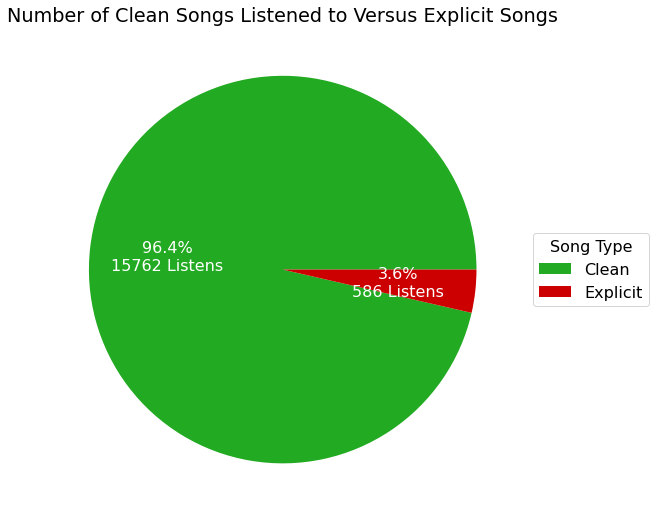

In [24]:
def show_explicit_pie_chart(data):
    fig, ax = plt.subplots()

    def label(pct, allvals):
        absolute = int(pct / 100 * np.sum(allvals))
        return "{:.1f}%\n{:d} Listens".format(pct, absolute)
    plt.pie(data[:,1], labels=["Clean", "Explicit"], autopct=lambda pct: label(pct, data[:,1]), colors=["#22aa22", "#cc0000"], textprops={"color": "w"})

    plt.title("Number of Clean Songs Listened to Versus Explicit Songs")
    plt.legend(title="Song Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()

data = trimmed_tracks_data_df[["id"]].merge(full_track_data_df[["id", "explicit"]], on="id")
data = data.groupby("explicit").size().reset_index(name="count").to_numpy()
show_explicit_pie_chart(data)

plt.show()

In [25]:
data = trimmed_tracks_data_df[["id", "count"]].drop_duplicates()
data = data.merge(full_track_data_df[["id", "explicit", "name", "album_name", "artist_names"]], on="id")
data = data[data["explicit"]]
data.sort_values(by="count", ascending=False).head(10).reset_index(drop=True)

,id,count,explicit,name,album_name,artist_names
0,7oj2jneHlEnzY2qqGr0lWf,47,True,Don't Wanna Dance,Unlovely,['The Ballroom Thieves']
1,51tHIBkRkYA4CS9WaPakDu,40,True,Dear McCracken,The Rough Draft,['Bug Hunter']
2,2vcwh4UGbHy3gkhCEvBDMn,33,True,Back & Forth,Sinking Ship / Back & Forth,['Wild Child']
3,3DChdA2w4ViRnfUFBNvlAE,33,True,Smoke,Smoke,['Five Islands']
4,5YUEx98onJjOs5io2LHLjb,28,True,I Wrote Mr. Tambourine Man (Live),Capricorn in Retrograde... Just Kidding... Liv...,['John Craigie']
5,4Xnz2LP9C6Q2Hkc92GWPz8,26,True,Homme Run,Unlovely,['The Ballroom Thieves']
6,1CzeuSrm71wHP9qsjg7p3F,23,True,The Story of Tonight - Reprise,Hamilton (Original Broadway Cast Recording),"['Anthony Ramos', 'Okieriete Onaodowan', 'Dave..."
7,6YjFI4i4mUHL54T67ucGj6,23,True,Missing You,Hard To Be Alone,['Barns Courtney']
8,4cxvludVmQxryrnx1m9FqL,21,True,My Shot,Hamilton (Original Broadway Cast Recording),"['Lin-Manuel Miranda', 'Anthony Ramos', 'Davee..."
9,3TfKt8mPpdXfQTMfRjHzyz,20,True,Cabinet Battle #1,Hamilton (Original Broadway Cast Recording),"['Christopher Jackson', 'Daveed Diggs', 'Lin-M..."


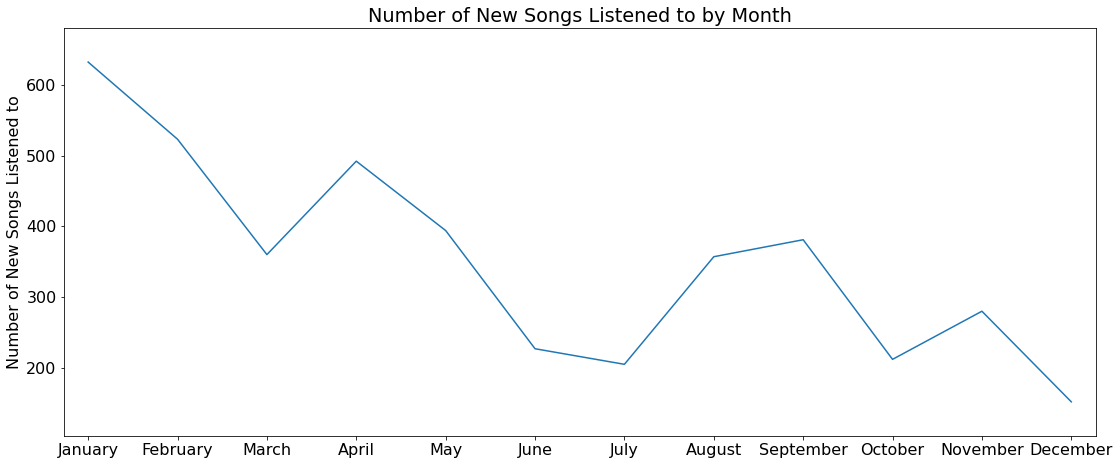

In [26]:
def show_new_plays_by_month(data):
    fig, ax = plt.subplots()
    plt.plot(data[:,0], data[:,1])
    plt.title("Number of New Songs Listened to by Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0] - 1:month_range[1]])
    plt.ylabel("Number of New Songs Listened to")
    plt.margins(0.025, 0.1)

data = trimmed_tracks_data_df[["id", "month"]].drop_duplicates(subset="id", keep="first")
data = data.groupby("month").count()
full_year_copy_df = full_year_df[["month", "ms_played"]].copy().drop_duplicates().rename({"ms_played": "id"}, axis=1).set_index("month")
full_year_copy_df.update(data)
data = full_year_copy_df.reset_index().to_numpy()
show_new_plays_by_month(data)

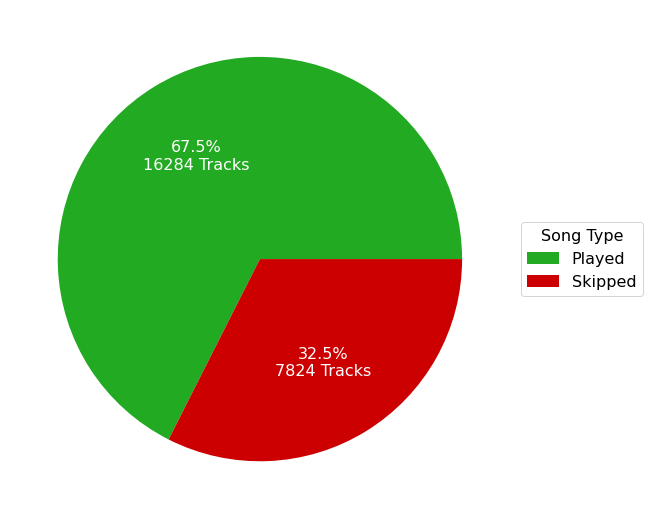

In [27]:
def show_new_pie_chart(data):
    fig, ax = plt.subplots()

    def label(pct, allvals):
        absolute = int(pct / 100 * np.sum(allvals))
        return "{:.1f}%\n{:d} Tracks".format(pct, absolute)
    plt.pie(data, labels=["Played", "Skipped"], autopct=lambda pct: label(pct, data), colors=["#22aa22", "#cc0000"], textprops={"color": "w"})

#     plt.title("Number of Clean Songs Listened to Versus Explicit Songs")
    plt.legend(title="Song Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()

new_data_df = complete_streaming_history_df[complete_streaming_history_df["type"] == "track"]
new_data_df = new_data_df.merge(full_track_data_df[["id", "duration_ms"]], on="id")
played_tracks_df = new_data_df[new_data_df["ms_played"] > (new_data_df["duration_ms"] / 2)]
skipped_tracks_df = new_data_df[new_data_df["ms_played"] <= (new_data_df["duration_ms"] / 2)]
show_new_pie_chart([played_tracks_df.shape[0], skipped_tracks_df.shape[0]])

plt.show()

## More will come soon!